# Predicting Diabetes 

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do ploting inline instead of in a seperate window
%matplotlib inline

/Users/schitranshi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Load the Data

In [2]:
df = pd.read_csv("~/ml/MachineLearningWithPython/Notebooks/data/pima-data.csv")

In [4]:
df.shape # shows the dimensions of the data

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## check for Null Values in the data

In [9]:
df.isnull().values.any()

False

In [10]:
def plot_corr(df,size=11):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    

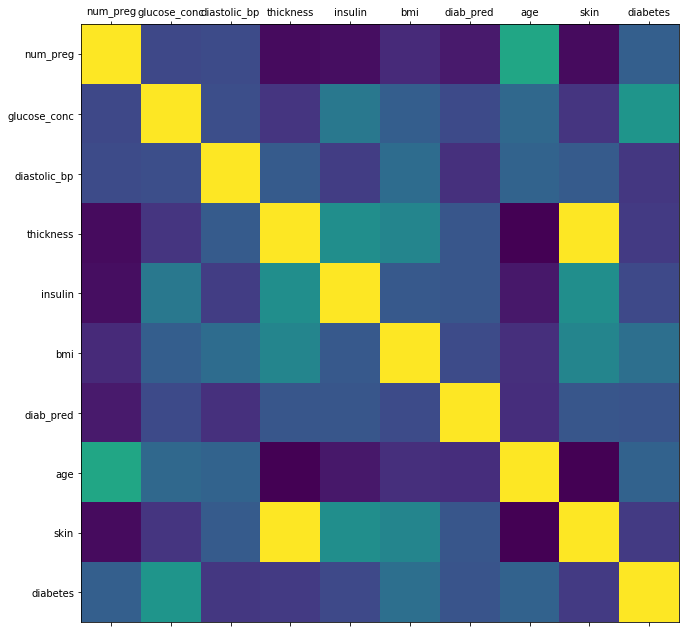

In [12]:
plot_corr(df)

## Check corrilation between data sets 

In [13]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [17]:
# as skin and thickness are strongly corrilated, 
# we will drop the skin column
del df['skin']

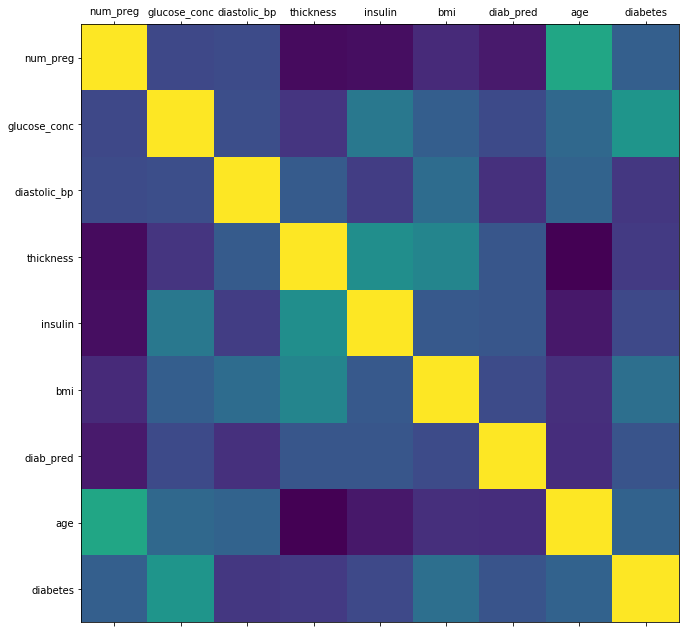

In [18]:
plot_corr(df)

In [20]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


for the data to work correctly with Algo, we need to convert True to 1 and False to 0

In [21]:
diabeties_map = {True:1, False:0}

In [22]:
df['diabetes'] = df['diabetes'].map(diabeties_map)

In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check True/False Ratio 

In [28]:
# check how much data we have of each category
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

In [29]:
num_true

268

In [30]:
num_false

500

In [34]:
per_true = num_true/(num_true+num_false)*100
per_false = num_false/(num_true+num_false)*100
print("true: {0} false: {1}".format(per_true,per_false))

true: 34.89583333333333 false: 65.10416666666666


finally time to run Learning algo


## split the data into training and test

70% training and 30% test

In [36]:
from sklearn.cross_validation import train_test_split

In [60]:
feature_col_names = list(df)
predicted_class_name = []
predicted_class_name.append(feature_col_names.pop())   # removed the last element as it is the Y (output)

X = df[feature_col_names].values
Y = df[predicted_class_name].values
split_test_size = 0.30
# this returns 4 numpy arrays 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=split_test_size,random_state=42)


Ensure that the split is 70 30.

In [67]:
print("Train Data: {0}%".format(len(X_train)/len(df.index)*100))
print("Test Data: {0}%".format(len(X_test)/len(df.index)*100))

Train Data: 69.921875%
Test Data: 30.078125%


### The Ratio is Correct, make sure the split is equally distributed

In [82]:
print("Number of True Cases in Train: {0}".format(len(Y_train[Y_train[:] == 1])/len(Y_train)*100))
print("Number of False Cases in Train: {0}".format(len(Y_train[Y_train[:] == 0])/len(Y_train)*100))

print("Number of True Cases in Test: {0}".format(len(Y_test[Y_test[:] == 1])/len(Y_test)*100))
print("Number of False Cases in Test: {0}".format(len(Y_test[Y_test[:] == 0])/len(Y_test)*100))

Number of True Cases in Train: 35.00931098696462
Number of False Cases in Train: 64.99068901303538
Number of True Cases in Test: 34.63203463203463
Number of False Cases in Test: 65.36796536796537


### Check for Null values or 0 values in DataSet Basically Missing Data

In [88]:
print("Number of Total Rows {}".format(len(df)))
print("Number of Zeros in glucose_conc {}".format(len(df.loc[df['glucose_conc'] == 0])))
print("Number of Zeros in num_preg {}".format(len(df.loc[df['num_preg'] == 0])))
print("Number of Zeros in diastolic_bp {}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("Number of Zeros in thickness {}".format(len(df.loc[df['thickness'] == 0])))
print("Number of Zeros in insulin {}".format(len(df.loc[df['insulin'] == 0])))
print("Number of Zeros in bmi {}".format(len(df.loc[df['bmi'] == 0])))
print("Number of Zeros in diab_pred {}".format(len(df.loc[df['diab_pred'] == 0])))
print("Number of Zeros in age {}".format(len(df.loc[df['age'] == 0])))


Number of Total Rows 768
Number of Zeros in glucose_conc 5
Number of Zeros in num_preg 111
Number of Zeros in diastolic_bp 35
Number of Zeros in thickness 227
Number of Zeros in insulin 374
Number of Zeros in bmi 11
Number of Zeros in diab_pred 0
Number of Zeros in age 0


The way to handle missing data includes :
 - ignore the missing values
 - delete the missing value rows 
 - impute the rows with reasonable values (Impute)

Impute the Mean for Insulin

In [99]:
from sklearn.preprocessing import Imputer
# impute with mean all 0 values

fill_0 = Imputer(missing_values=0,strategy="mean",axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Train Our Initial Algorithm Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

In [103]:
nb_model.get_params()

{'priors': None}

### Check Performance of Our Model

In [106]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

# we use metrrices to take care of matrix calaculations and show us result of performance
print("Accuracy: {}".format(metrics.accuracy_score(Y_train,nb_predict_train)))

Accuracy: 0.7541899441340782


### Performance on Test Data

In [107]:
nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: 0.7359307359307359


### Perfromance Report 

In [108]:
# confusion Matrix shows false positive and false negative counts
print("confusion Matrix ")
print("{}".format(metrics.confusion_matrix(Y_test,nb_predict_test,labels=[1,0])))
# first colum is predicted true and first row is actual True
# second column is predicted false and last row is actual false

print("")
print("classification Matrix")
print("{}".format(metrics.classification_report(Y_test,nb_predict_test)))

confusion Matrix 
[[ 52  28]
 [ 33 118]]

classification Matrix
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



confusion matrix is the count of prediction true or false
left column is true and right column is false 
top row is actual true and bottom row is actual false
- [TP FP
- FN FN]
 
 
 
 the classification report generates statistics based on the confusion matrix
 
recall - is the rate of true prediction for actual correct prediction.
recall = TP/(TP+FN) - Actual True prediction / actual true prediction + true prediction which are False


### Improve the performance of our Algorithm

There are ways to improve the performance - 
- Adjust the hyper parameter of the Algo (NB has no algo)
- Get more data or improved data ratio (Cant get more data for now)
- improve training 
- Switch Algorithms (Lets start with this)

Lets Try 'Random Forest'

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [111]:
rf_predict_train = rf.predict(X_train)
#training matrices
print("Accuracy: {}".format(metrics.accuracy_score(Y_train,rf_predict_train)))

Accuracy: 0.9869646182495344


#### Predict Test Data 

In [112]:
rf_predict_test = rf.predict(X_test)
#training Matrieces 
print("Accuracy: {}".format(metrics.accuracy_score(Y_test,rf_predict_test)))

Accuracy: 0.70995670995671


This is not cool. As with the train data its giving 98 percent accuracy but with test data just 71 
this is a classic example of **Overfitting** the Train data

When the model fits too well with the train data
Techniques to handle Overfitting - 
- Hyper parameters (Tuning knobs), for Overfitting we use regularization
- Cross validation (using multiple subset of training data TBC)

#### Bias Variance tradeoff 
tradeoff between the accuracy on train data versus accuracy on real world or test data

### Logistic Regression 

In [113]:
from sklearn.linear_model import LogisticRegression

# C is the hyper parameter initialize it with 0.7
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train,Y_train.ravel())
lr_predict_test = lr_model.predict(X_test)


In [114]:
#print the results 
print("confusion Matrix ")
print("{}".format(metrics.confusion_matrix(Y_test,lr_predict_test,labels=[1,0])))
# first colum is predicted true and first row is actual True
# second column is predicted false and last row is actual false

print("")
print("classification Matrix")
print("{}".format(metrics.classification_report(Y_test,lr_predict_test)))

confusion Matrix 
[[ 44  36]
 [ 23 128]]

classification Matrix
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



#### Imbalance in the Data set 


this causes the model to be trained to predict more cases as one of the output. 
Some Algorithm have hyper parameter to compensate for this imbalance, which results in a shift in the predicted class boundary

In [ ]:
lr_model_2 = LogisticRegression(C=0.7,class_weight="balanced",random_state=42)
lr_model_2.fit(X_train,Y_train.ravel())
lr_predict_test_2 = lr_model.predict(X_test)


#print the results 
print("confusion Matrix ")
print("{}".format(metrics.confusion_matrix(Y_test,lr_predict_test_2,labels=[1,0])))
# first colum is predicted true and first row is actual True
# second column is predicted false and last row is actual false

print("")
print("classification Matrix")
print("{}".format(metrics.classification_report(Y_test,lr_predict_test_2)))

This is a good performing data, but we have set the hyper parameter C based on the Test set (Not in this Sheet)
To make sure we have choosen the best hyper parameters, such that the algorithm works best in real world senarios
we have to do **Cross Validation **

### Cross Validation

**K-Fold Cross Validation ** - split the training data into N folds, each of equal size, then take one fold as validation data and rest as training set. Repeat this for each fold. and finally decide the hyper parameter based on the accuracy of the model in each case

Sklearn has many algorithms implemented with Cross Validation, the naming convention is AlgoCV, these implementation have extra code to determine the best hyper parameter, they take longer to run.

### Logistic RegressionCV

In [117]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=True,class_weight="balanced")
lr_cv_model.fit(X_train,Y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Predict on Test Data

In [118]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

#print the results 
print("confusion Matrix ")
print("{}".format(metrics.confusion_matrix(Y_test,lr_cv_predict_test,labels=[1,0])))
# first colum is predicted true and first row is actual True
# second column is predicted false and last row is actual false

print("")
print("classification Matrix")
print("{}".format(metrics.classification_report(Y_test,lr_cv_predict_test)))

confusion Matrix 
[[ 51  29]
 [ 44 107]]

classification Matrix
             precision    recall  f1-score   support

          0       0.79      0.71      0.75       151
          1       0.54      0.64      0.58        80

avg / total       0.70      0.68      0.69       231

